## Install necessary packages

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [0]:
from fastai.vision import *

Scroll all the way down and use option + command + j to run the following command
```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [3]:
folder = 'three_wheels'
file = 'three_wheels.csv'
path = Path('data/three_wheels')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [4]:
folder = 'bicycle'
file = 'bicycle.csv'
path = Path('data/three_wheels')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [5]:
folder = 'motorcycle'
file = 'motorcycle.csv'
path = Path('data/three_wheels')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [6]:
path.ls()

[PosixPath('data/three_wheels/three_wheels.csv'),
 PosixPath('data/three_wheels/.ipynb_checkpoints'),
 PosixPath('data/three_wheels/bicycle.csv'),
 PosixPath('data/three_wheels/three_wheels'),
 PosixPath('data/three_wheels/motorcycle.csv'),
 PosixPath('data/three_wheels/bicycle'),
 PosixPath('data/three_wheels/motorcycle')]

In [0]:
classes = ['bicycle','motorcycle','three_wheels']

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bicycle


motorcycle


three_wheels


In [0]:
np.random.seed(128)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['bicycle', 'motorcycle', 'three_wheels']

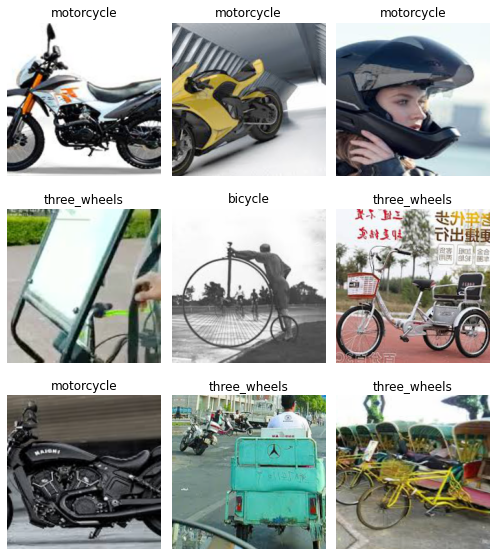

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bicycle', 'motorcycle', 'three_wheels'], 3, 1313, 328)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


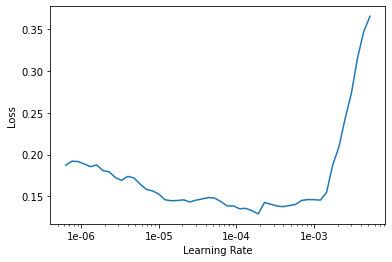

In [18]:
lr_find(learn)
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-3))

In [0]:
learn.save('stage-2')

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [25]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [26]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
 np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [29]:
learn.fit_one_cycle(4)

In [30]:
learn.fit_one_cycle(2)

In [32]:
learn.fit_one_cycle(2)

In [0]:
learn.export()

## Production time

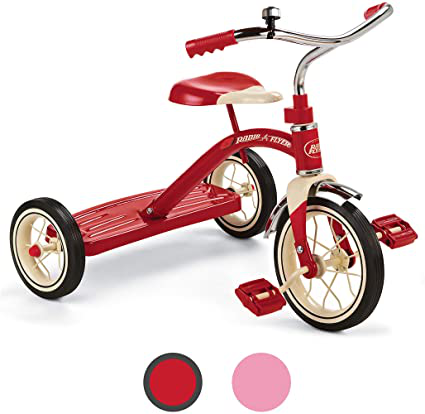

In [34]:
img = open_image('tricycle1.jpg')
img

In [0]:
learn = load_learner(path)

In [36]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The rider you are seeing is probably a ', pred_class)

The rider you are seeing is probably a  three_wheels


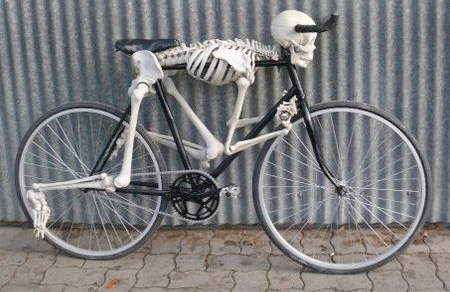

In [37]:
img = open_image('bike.jpg')
img

In [39]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The rider you are seeing is probably a', pred_class)

The rider you are seeing is probably a  bicycle


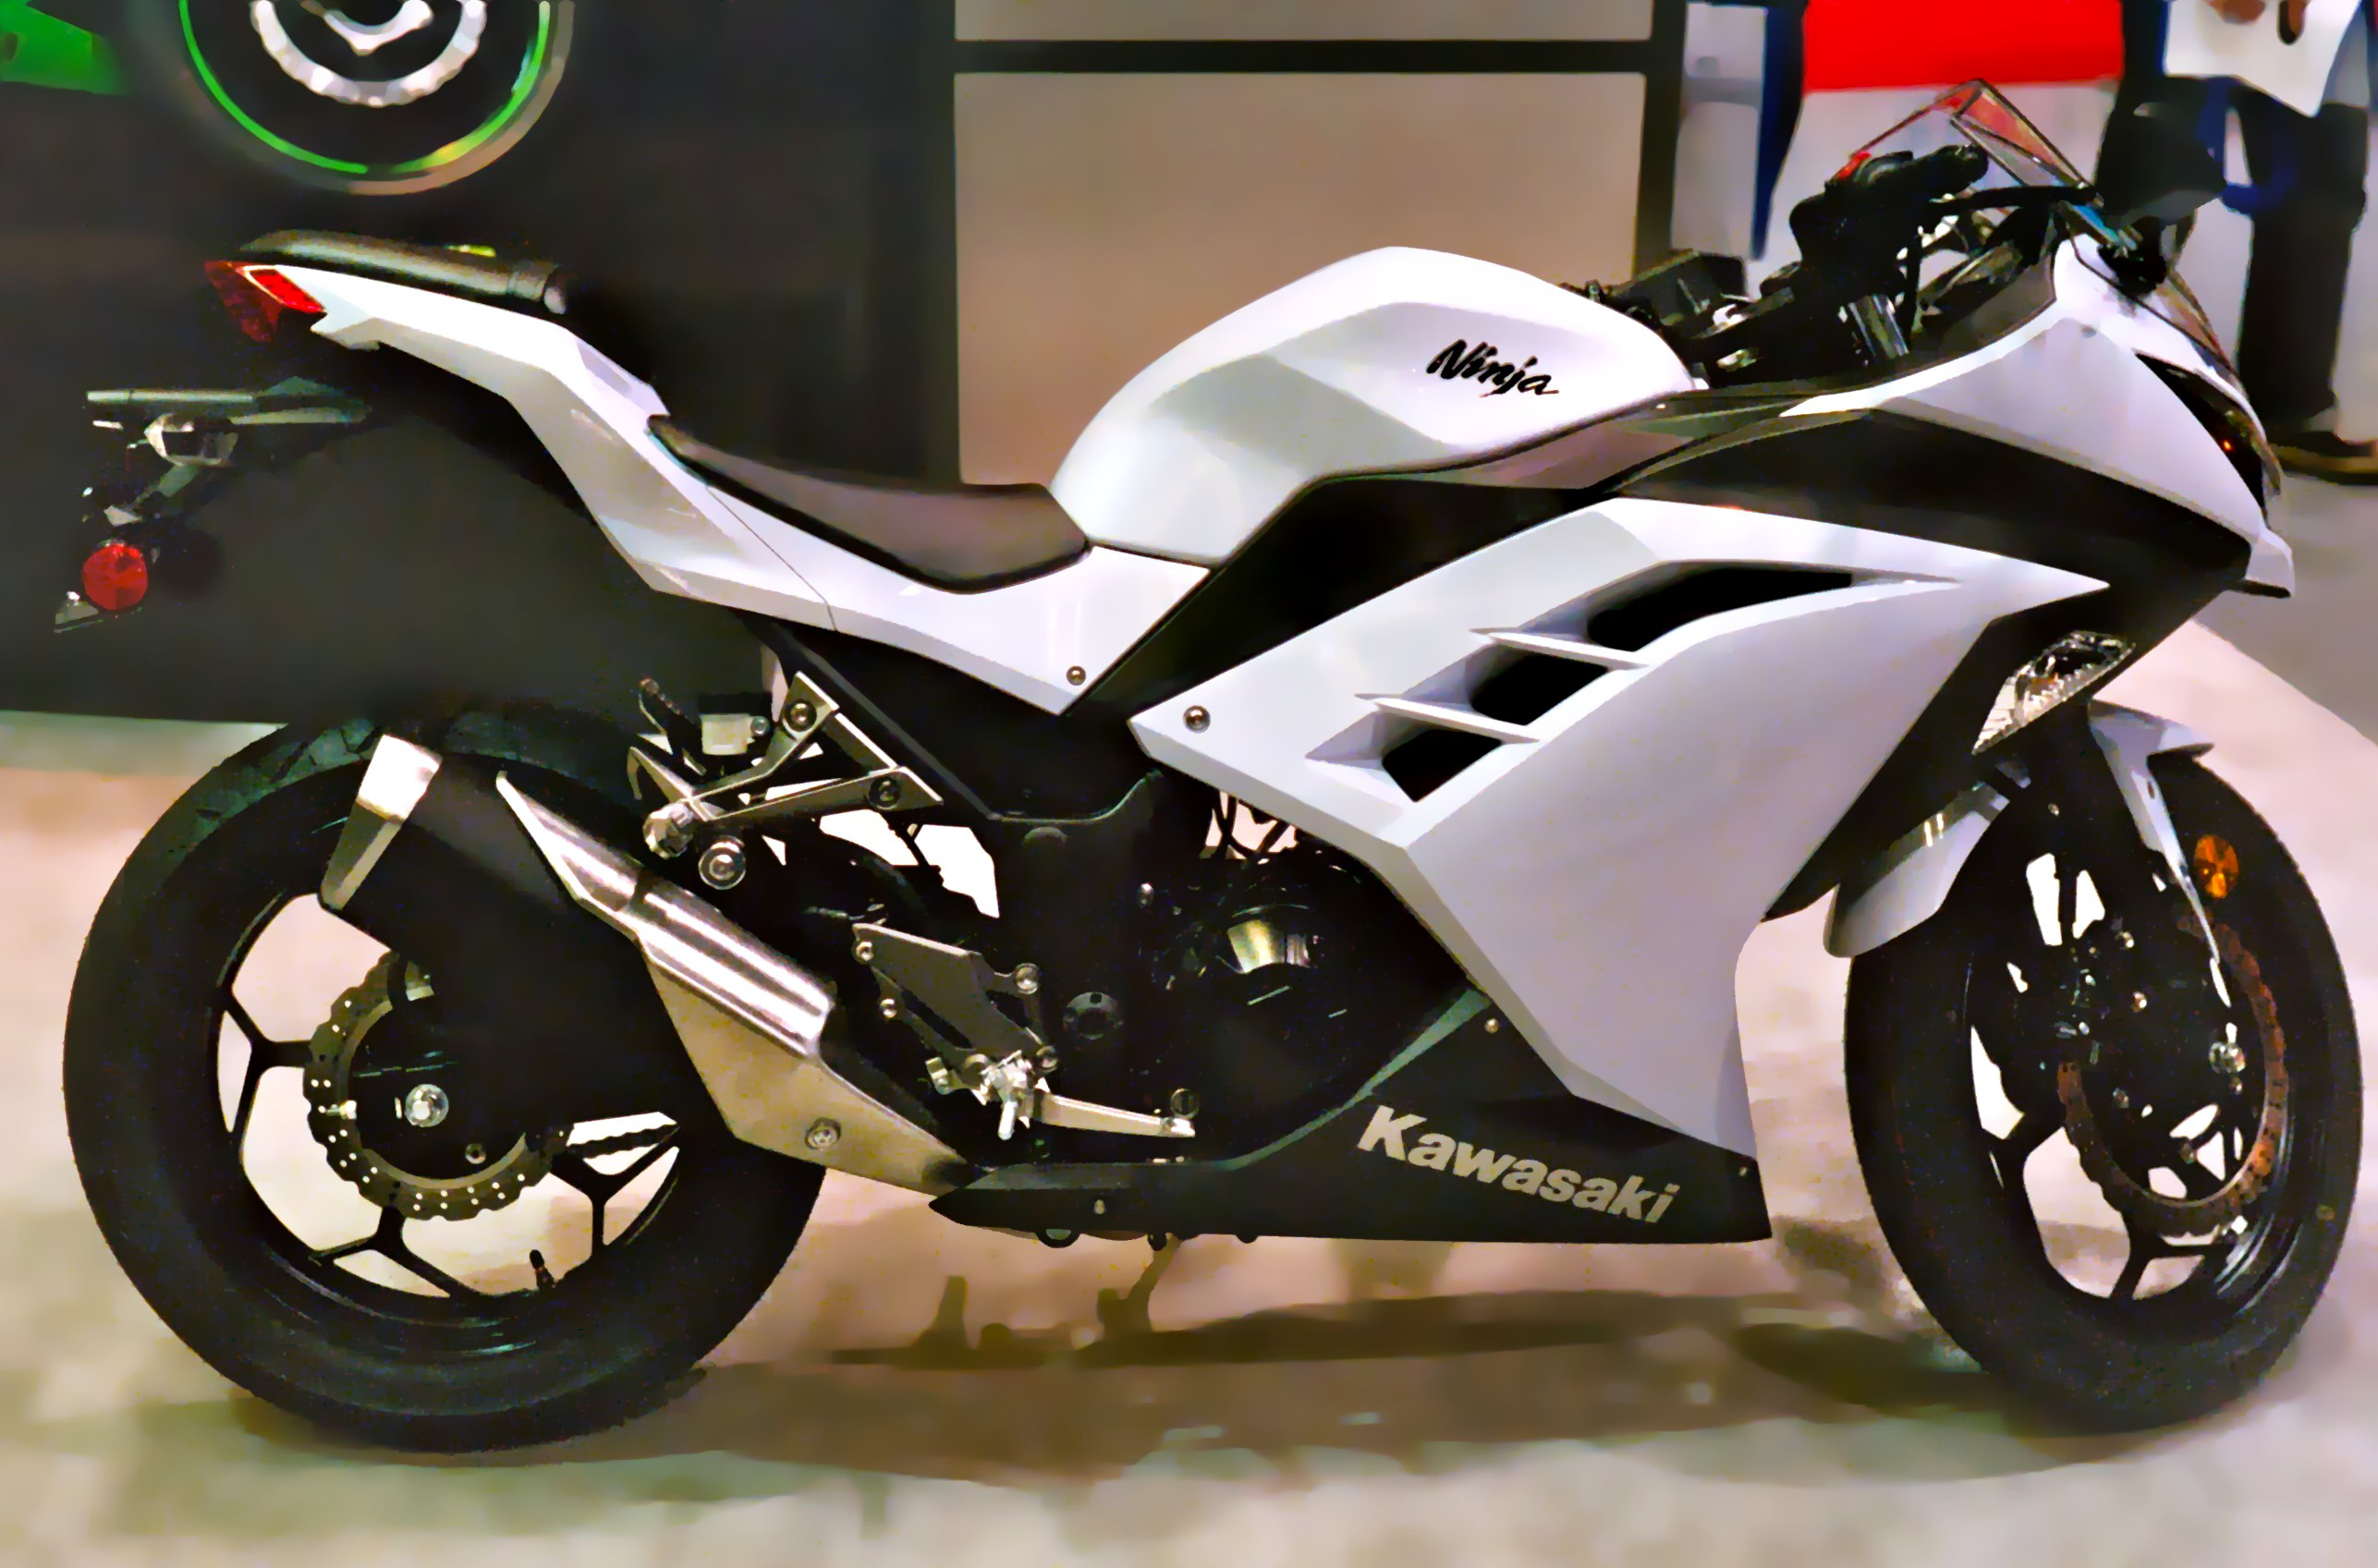

In [41]:
img = open_image('moto.jpg')
img

In [42]:
pred_class,pred_idx,outputs = learn.predict(img)
print('The rider you are seeing is probably a', pred_class)

The rider you are seeing is probably a motorcycle
